# Chapter 4: Dynamic Programming
---

**Chapter Overview**: Dynamic Programming (DP) provides a collection of algorithms for computing optimal policies given a **perfect model** of the environment as a Markov Decision Process (MDP). While computationally expensive and requiring a complete model, DP forms the theoretical foundation for all reinforcement learning methods.

**Key Insight**: All DP algorithms use the Bellman equations to transform the problem of finding optimal policies into iterative computational procedures.

**Developer Intuition**: Think of DP in RL as similar to dynamic programming in computer science:
- **Overlapping subproblems**: The value of each state depends on values of other states
- **Optimal substructure**: Optimal policy from a state depends on optimal policies from successor states
- **Memoization/Caching**: Store computed values to avoid recomputation
- **Bottom-up approach**: Build solutions from smaller subproblems (though RL DP can be more flexible)

---

## 4.1 Policy Evaluation (Prediction)

**The Problem**: Given a policy π, compute the state-value function $v_\pi$.

### The Bellman Equation for $v_\pi$

**Recall from Chapter 3** (_Equation 4.3-4.4_):
$$v_\pi(s) = \mathbb{E}_\pi[G_t | S_t = s] = \sum_a \pi(a|s) \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

**Components**:
- $\pi(a|s)$: Probability of taking action $a$ in state $s$ under policy $\pi$
- $p(s', r|s, a)$: Dynamics - probability of transitioning to $s'$ with reward $r$
- $r$: Immediate reward
- $\gamma v_\pi(s')$: Discounted future value
- Expectation is over both action selection (via $\pi$) and environment dynamics

### Iterative Policy Evaluation

**Key Idea**: Turn the Bellman equation into an update rule.

**Update Rule** (_Equation 4.5_):
$$v_{k+1}(s) = \sum_a \pi(a|s) \sum_{s',r} p(s', r|s, a)[r + \gamma v_k(s')]$$

**Algorithm Intuition**:
1. Start with arbitrary value estimates $v_0(s)$ for all states
2. Repeatedly apply the update rule to all states
3. Values converge to true $v_\pi$ as $k \to \infty$

**Why it works**: This is a contraction mapping - each iteration brings estimates closer to the true values. The Bellman equation has a unique fixed point at $v_\pi$.

### Implementation Details

**Two approaches**:
1. **Two-array version**: Keep old values in one array while computing new values
   - Also called "synchronous" or "Jacobi-style"
   - All states updated "simultaneously"
   
2. **In-place version**: Update values directly in single array
   - Also called "Gauss-Seidel-style"
   - Often converges faster as it uses new values immediately
   - Order of state updates can affect convergence speed

**Pseudocode for In-Place Policy Evaluation**:

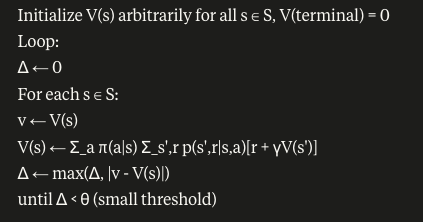

**Practical Note**: Must stop when changes are "small enough" since exact convergence requires infinite iterations.

### Example 4.1: 4×4 Gridworld

![4x4 Gridworld](../img/fig4_1.png)

**Setup**:
- States: 14 non-terminal positions + 2 terminal states
- Actions: {up, down, left, right}
- Dynamics: Deterministic movement, stay in place if hit wall
- Reward: -1 on all transitions until terminal state
- Policy: Random (all actions equally likely)

**Results show**: How negative values propagate from edges inward, with states further from terminals having more negative values (more steps to termination).

---

## 4.2 Policy Improvement

**The Problem**: Given a policy π and its value function $v_\pi$, find a better policy.

### The Policy Improvement Theorem

**Key Question**: For state $s$, should we deviate from $\pi(s)$ and take action $a$ instead?

**Action-Value Under Current Policy** (_Equation 4.6_):
$$q_\pi(s, a) = \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

**Interpretation**: Expected return if we take action $a$ in state $s$, then follow $\pi$ thereafter.

### 🏆 Policy Improvement Theorem

**If** $q_\pi(s, \pi'(s)) \geq v_\pi(s)$ for all $s \in S$

**Then** $v_{\pi'}(s) \geq v_\pi(s)$ for all $s \in S$

**Moreover**: If strict inequality holds for any state, then $\pi'$ is strictly better than $\pi$.

**Proof Intuition**: 
- Start with the inequality at one step
- Expand recursively using Bellman equations
- Inequalities propagate through all future time steps
- Result: Total expected return under $\pi'$ ≥ total under $\pi$

### Greedy Policy Improvement

**🏆 Greedy Policy Construction** (_Equation 4.9_):
$$\pi'(s) = \arg\max_a q_\pi(s, a) = \arg\max_a \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

**Key Properties**:
- Takes the action that looks best according to current value estimates
- One-step lookahead using $v_\pi$
- Guaranteed to be at least as good as $\pi$ (usually better)
- If no improvement possible, then $\pi$ is already optimal

**When Greedy Equals Optimal**: If the greedy policy equals the original policy, then:
$$v_\pi(s) = \max_a \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

This is the Bellman optimality equation! So $v_\pi = v_*$ and $\pi$ is optimal.

---

## 4.3 Policy Iteration

**Core Idea**: Alternate between policy evaluation and policy improvement until convergence.

### The Policy Iteration Algorithm

**Sequence**:
$$\pi_0 \xrightarrow{E} v_{\pi_0} \xrightarrow{I} \pi_1 \xrightarrow{E} v_{\pi_1} \xrightarrow{I} \pi_2 \xrightarrow{E} \cdots \xrightarrow{I} \pi_* \xrightarrow{E} v_*$$

Where:
- $E$: Policy Evaluation
- $I$: Policy Improvement (greedy)

**Convergence Guarantee**: Finite MDPs have finite number of deterministic policies, so must converge to optimal in finite iterations.

**Complete Algorithm**:

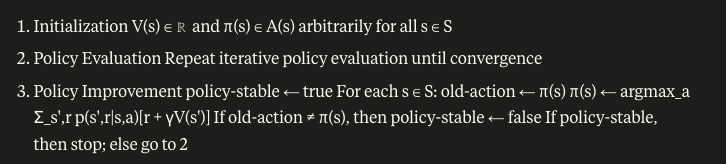

**Efficiency Note**: Each evaluation starts with value function from previous policy, dramatically speeding convergence.

### Example 4.2: Jack's Car Rental

![Jack's Car Rental](../img/fig4_2.png)

**Complex Problem Features**:
- 2D state space (cars at each location)
- Stochastic requests and returns (Poisson)
- Constraints (max 20 cars, max 5 moves)
- Non-linear costs

**Key Insight**: Policy iteration handles this complexity naturally, finding optimal car movement strategy in just a few iterations.

---

## 4.4 Value Iteration

**Motivation**: Policy iteration requires full policy evaluation each iteration. Can we truncate evaluation?

### The Value Iteration Update

**🏆 FOUNDATIONAL FORMULA** (_Equation 4.10_):
$$v_{k+1}(s) = \max_a \sum_{s',r} p(s', r|s, a)[r + \gamma v_k(s')]$$

**Key Insight**: This combines policy improvement and (truncated) policy evaluation in a single update!

**Relationship to Bellman Optimality Equation**:
- Value iteration simply turns the Bellman optimality equation into an update rule
- Direct pursuit of $v_*$ without explicit policy representation
- Policy extracted at the end via greedy selection

**Algorithm**:

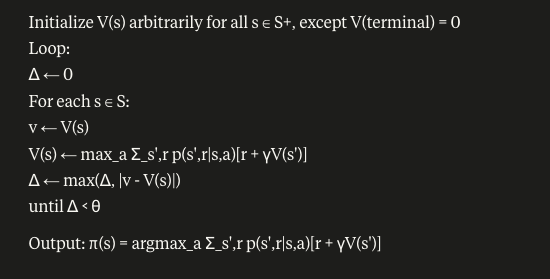

### Understanding Value Iteration

**As Truncated Policy Iteration**:
- Policy evaluation: Just one sweep
- Policy improvement: Implicit in max operation
- Repeat until convergence

**Backup Diagram Comparison**:
- Policy evaluation: Expectation over actions (weighted by π)
- Value iteration: Max over actions
- Both: Expectation over next states

### Example 4.3: Gambler's Problem

![Gambler's Problem](../img/fig4_3.png)

**Problem**: Betting on coin flips to reach $100 before going broke

**State space**: Capital ∈ {1, 2, ..., 99}  
**Actions**: Stake ∈ {0, 1, ..., min(s, 100-s)}  
**Dynamics**: Win with probability $p_h$, lose with probability $1-p_h$

**Interesting Features**:
- Optimal policy has surprising structure (e.g., bet everything at 50)
- Multiple optimal policies exist
- Shows how value iteration reveals non-intuitive strategies

---

## 4.5 Asynchronous Dynamic Programming

**Motivation**: Standard DP requires sweeps through entire state space - prohibitive for large problems (e.g., backgammon has 10²⁰ states).

### Key Ideas

**Asynchronous Updates**:
- Update states in any order
- Use whatever values are available
- Don't wait for complete sweeps
- Must continue updating all states (can't abandon any permanently)

**Flexibility Benefits**:
- Focus on important states
- Interleave with agent experience
- Parallelize computation
- Skip irrelevant states

**Convergence**: Still guaranteed if all states updated infinitely often (even randomly).

### Practical Advantages

**Efficient Value Propagation**:
- Update states along likely trajectories
- Prioritize states needing large updates
- Focus on states agent actually visits

**Real-time Interaction**:
- Agent acts while learning
- Updates applied to visited states
- Latest values guide decisions
- Natural exploration of relevant state space

---

## 4.6 Generalized Policy Iteration (GPI)

**🏆 FUNDAMENTAL CONCEPT**: The heart of all reinforcement learning!

![GPI Diagram](../img/gpi_diagram.png)

### The GPI Framework

**Two Processes**:
1. **Policy Evaluation**: Make value function consistent with policy
   - Drive $v$ toward $v_\pi$
   
2. **Policy Improvement**: Make policy greedy w.r.t. value function  
   - Drive $\pi$ toward greedy($v$)

**Key Insight**: These processes:
- **Compete**: Each makes the other "wrong"
- **Cooperate**: Together find optimal solution
- **Stabilize**: Only when both conditions satisfied simultaneously

### GPI Variations

**Granularity Spectrum**:
- **Policy Iteration**: Complete evaluation before improvement
- **Value Iteration**: One evaluation step per improvement
- **Asynchronous DP**: Arbitrary interleaving
- **Monte Carlo**: Episode-based evaluation
- **TD Learning**: Single-step evaluation

**The GPI Principle**: Almost all RL methods follow this pattern - maintain approximate policy and value function, improve each with respect to the other.

### Geometric Interpretation

![GPI Geometric View](../img/fig4_7.png)

**Two Constraints**:
- $v = v_\pi$ (evaluation line)
- $\pi = \text{greedy}(v)$ (improvement line)

**Convergence**: Only intersection satisfies both → optimal solution.

---

## 4.7 Efficiency of Dynamic Programming

### Computational Complexity

**Worst-case bounds**:
- Time: Polynomial in $|S|$ and $|A|$
- Better than exhaustive search through $|A|^{|S|}$ policies
- Linear programming alternative often worse in practice

**Curse of Dimensionality**:
- State space often exponential in problem features
- But this is problem's fault, not DP's
- DP relatively efficient for exact solutions

### Practical Considerations

**When DP Works Well**:
- Millions of states feasible with modern computers
- Good initial values speed convergence
- Asynchronous methods focus computation efficiently

**Comparison to Alternatives**:
- Direct policy search: Exponentially slower
- Linear programming: ~100× fewer states before intractable
- DP best for exact solutions when model available

---

## 4.8 Summary

### Key Concepts

**Policy Evaluation**: Compute $v_\pi$ by iteratively applying Bellman expectation equation

**Policy Improvement**: Construct better policy by acting greedily w.r.t. current value function

**Policy Iteration**: Alternate complete evaluation and improvement until optimal

**Value Iteration**: Combine truncated evaluation and improvement in single update

**Asynchronous DP**: Update states in flexible order without sweeps

**Generalized Policy Iteration (GPI)**: Framework unifying all RL methods

### Fundamental Insights

1. **Bootstrapping**: DP updates estimates based on other estimates
   - Contrast with Monte Carlo (uses actual returns)
   - Enables learning before episode ends
   
2. **Model Requirement**: DP needs complete knowledge of $p(s',r|s,a)$
   - Enables planning via computation
   - Limits applicability to known environments
   
3. **Optimal Substructure**: Optimal value functions satisfy Bellman optimality equations
   - Transform optimization into iterative computation
   - Guarantee convergence to unique optimal solution

### Connections to Broader RL

**What's Next**:
- **Chapter 5**: Monte Carlo methods - no model required, no bootstrapping
- **Chapter 6**: TD methods - no model required, but with bootstrapping
- **Later**: Function approximation for large state spaces

**The DP Legacy**: All methods approximate DP's behavior while relaxing its requirements.

---


## Exercises

### Exercise 4.1
**Q**: In Example 4.1, if π is equiprobable random policy, what is $q_\pi(11, \text{down})$? What is $q_\pi(7, \text{down})$?

```python
# Solution for Exercise 4.1
# For the 4x4 gridworld with equiprobable random policy

# q_π(11, down):
# From state 11, going down leads to terminal state
# Immediate reward: -1
# Future value: 0 (terminal)
q_pi_11_down = -1 + 0  # = -1

# q_π(7, down):
# From state 7, going down hits wall, stays at 7
# Immediate reward: -1
# Future value: v_π(7) which we can see from Figure 4.1 is -14
q_pi_7_down = -1 + (-14)  # = -15

print(f"q_π(11, down) = {q_pi_11_down}")
print(f"q_π(7, down) = {q_pi_7_down}")
```

### Exercise 4.2
**Q**: In Example 4.1, suppose state 15 added below state 13. Under original dynamics, what is $v_\pi(15)$? If state 13's down action now goes to 15?

```python

# Case 1: State 15 added, original dynamics unchanged
# State 15 has 4 actions:
# - left → 12 (v = -22)
# - up → 13 (v = -20)  
# - right → 14 (v = -14)
# - down → 15 (v = unknown, call it x)

# Bellman equation for state 15:
# x = 0.25 * [-1 + (-22)] + 0.25 * [-1 + (-20)] + 
#     0.25 * [-1 + (-14)] + 0.25 * [-1 + x]
# x = 0.25 * (-23 - 21 - 15 - 1 + x)
# x = 0.25 * (-60 + x)
# x = -15 + 0.25x
# 0.75x = -15
# x = -20

v_pi_15_case1 = -20

# Case 2: State 13's down action goes to 15
# This creates different dynamics - state 15 is now easier to reach
# States leading to 15: 12(right), 13(down), 14(left), 15(down)
# Need to solve coupled equations, but intuitively v_π(15) will be 
# slightly less negative due to easier access from state 13

print(f"v_π(15) with original dynamics = {v_pi_15_case1}")
print("v_π(15) with modified dynamics would need full policy evaluation")
```

Exercise 4.4
Q: Fix policy iteration bug for equally good policies.

```python
# Modified policy iteration to handle ties properly

def policy_iteration_fixed():
    """
    Fixed version that handles multiple equally good policies
    by detecting when no strict improvement is possible
    """
    # In policy improvement step:
    policy_stable = True
    for s in states:
        old_action = pi[s]
        
        # Find ALL optimal actions
        action_values = {}
        for a in actions[s]:
            action_values[a] = sum(
                p * (r + gamma * V[s_prime])
                for (s_prime, r, p) in dynamics(s, a)
            )
        
        max_value = max(action_values.values())
        optimal_actions = [a for a, v in action_values.items() 
                          if v == max_value]
        
        # Check if old action is among optimal actions
        if old_action not in optimal_actions:
            policy_stable = False
            pi[s] = optimal_actions[0]  # Pick any optimal action
    
    return policy_stable
```

### Exercise 4.7 (Programming)
Q: Implement policy iteration for Jack's car rental with free shuttle and parking costs.

```python
import numpy as np
from scipy.stats import poisson

def jacks_car_rental_modified():
    """
    Jack's car rental with:
    - One free car movement from location 1 to 2
    - $4 cost for >10 cars at a location
    """
    max_cars = 20
    max_move = 5
    rental_reward = 10
    move_cost = 2
    parking_cost = 4
    parking_threshold = 10
    gamma = 0.9
    
    # Poisson parameters
    lambda_requests = [3, 4]  # Expected requests at each location
    lambda_returns = [3, 2]   # Expected returns at each location
    
    # State space: (cars_at_1, cars_at_2)
    states = [(i, j) for i in range(max_cars + 1) 
              for j in range(max_cars + 1)]
    
    # Initialize policy and values
    policy = np.zeros((max_cars + 1, max_cars + 1), dtype=int)
    V = np.zeros((max_cars + 1, max_cars + 1))
    
    def expected_return(state, action):
        """Calculate expected return for state-action pair"""
        cars_1, cars_2 = state
        
        # Apply action (movement)
        move_cost_total = 0
        if action > 0:  # Moving from 1 to 2
            # First car is free
            move_cost_total = (action - 1) * move_cost
        else:  # Moving from 2 to 1
            move_cost_total = abs(action) * move_cost
            
        cars_1 -= action
        cars_2 += action
        
        # Calculate expected return including:
        # - Rental rewards
        # - Movement costs  
        # - Parking costs
        # - Future value
        
        # ... (implementation details)
        
        return expected_value
    
    # Policy iteration main loop
    # ... (similar to standard policy iteration)
    
    return policy, V
```

### Exercise 4.9 (Programming)
Q: Implement value iteration for gambler's problem with $p_h = 0.25$ and $p_h = 0.55$.

```python
import numpy as np
import matplotlib.pyplot as plt

def gamblers_problem(p_h, theta=1e-8):
    """
    Value iteration for gambler's problem
    p_h: probability of heads
    """
    # States: capital from 1 to 99 (0 and 100 are terminal)
    V = np.zeros(101)
    V[100] = 1  # Win state has value 1
    
    def value_iteration():
        while True:
            delta = 0
            for s in range(1, 100):
                v = V[s]
                
                # Calculate value for all possible actions
                action_values = []
                for a in range(0, min(s, 100 - s) + 1):
                    # Expected value of this action
                    ev = p_h * V[s + a] + (1 - p_h) * V[s - a]
                    action_values.append(ev)
                
                V[s] = max(action_values)
                delta = max(delta, abs(v - V[s]))
            
            if delta < theta:
                break
        
        # Extract optimal policy
        policy = np.zeros(100)
        for s in range(1, 100):
            action_values = []
            actions = []
            for a in range(0, min(s, 100 - s) + 1):
                ev = p_h * V[s + a] + (1 - p_h) * V[s - a]
                action_values.append(ev)
                actions.append(a)
            
            policy[s] = actions[np.argmax(action_values)]
        
        return V[1:100], policy[1:100]
    
    return value_iteration()

# Run for both probability values
V_025, policy_025 = gamblers_problem(0.25)
V_055, policy_055 = gamblers_problem(0.55)

# Plotting code
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# ... (plot values and policies)
```

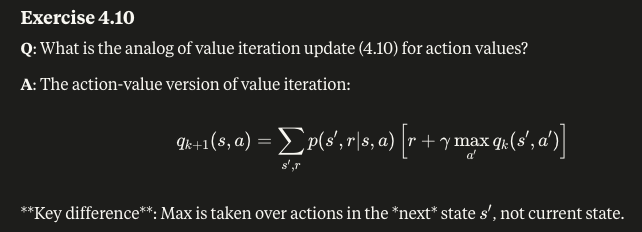

---
---